EDA (2nd version)

In [1]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bring data and mask target
total_data = pd.read_csv("../data/interim/eda_total_data.csv")
target = 'Transported'

# Visualize data
total_data.head(3)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False


2. Multivariable analysis

Defino una función para poder graficar y que el notebook sea mas limpio.

In [2]:
def multi_var_plot(variable,figsize=(16,6),**kwargs):
    plt.figure(figsize=figsize)
    sns.histplot(x=total_data[variable],
             hue=target,
             data=total_data,
             palette="Set1",
             **kwargs)
    plt.title(f"{variable} Feature Distribution")

Age vs target

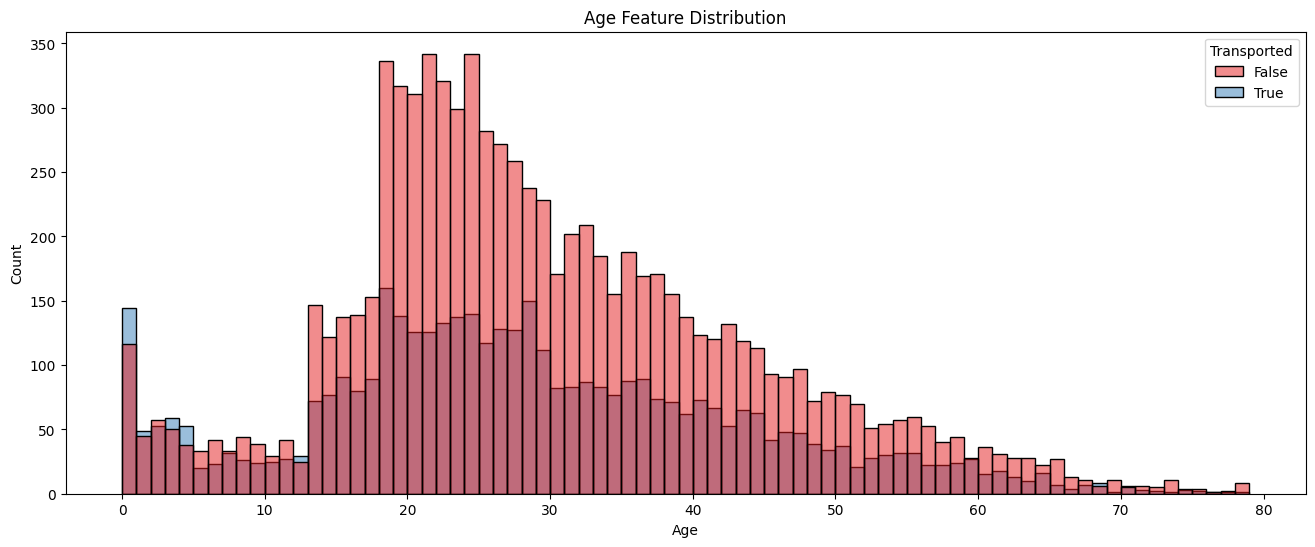

In [3]:
plt.figure(figsize=(16,6))
sns.histplot(x=total_data['Age'],
            hue=target,
            data=total_data,
            palette="Set1",
            binwidth=1)
plt.title("Age Feature Distribution")
plt.show()

Categorical vs target

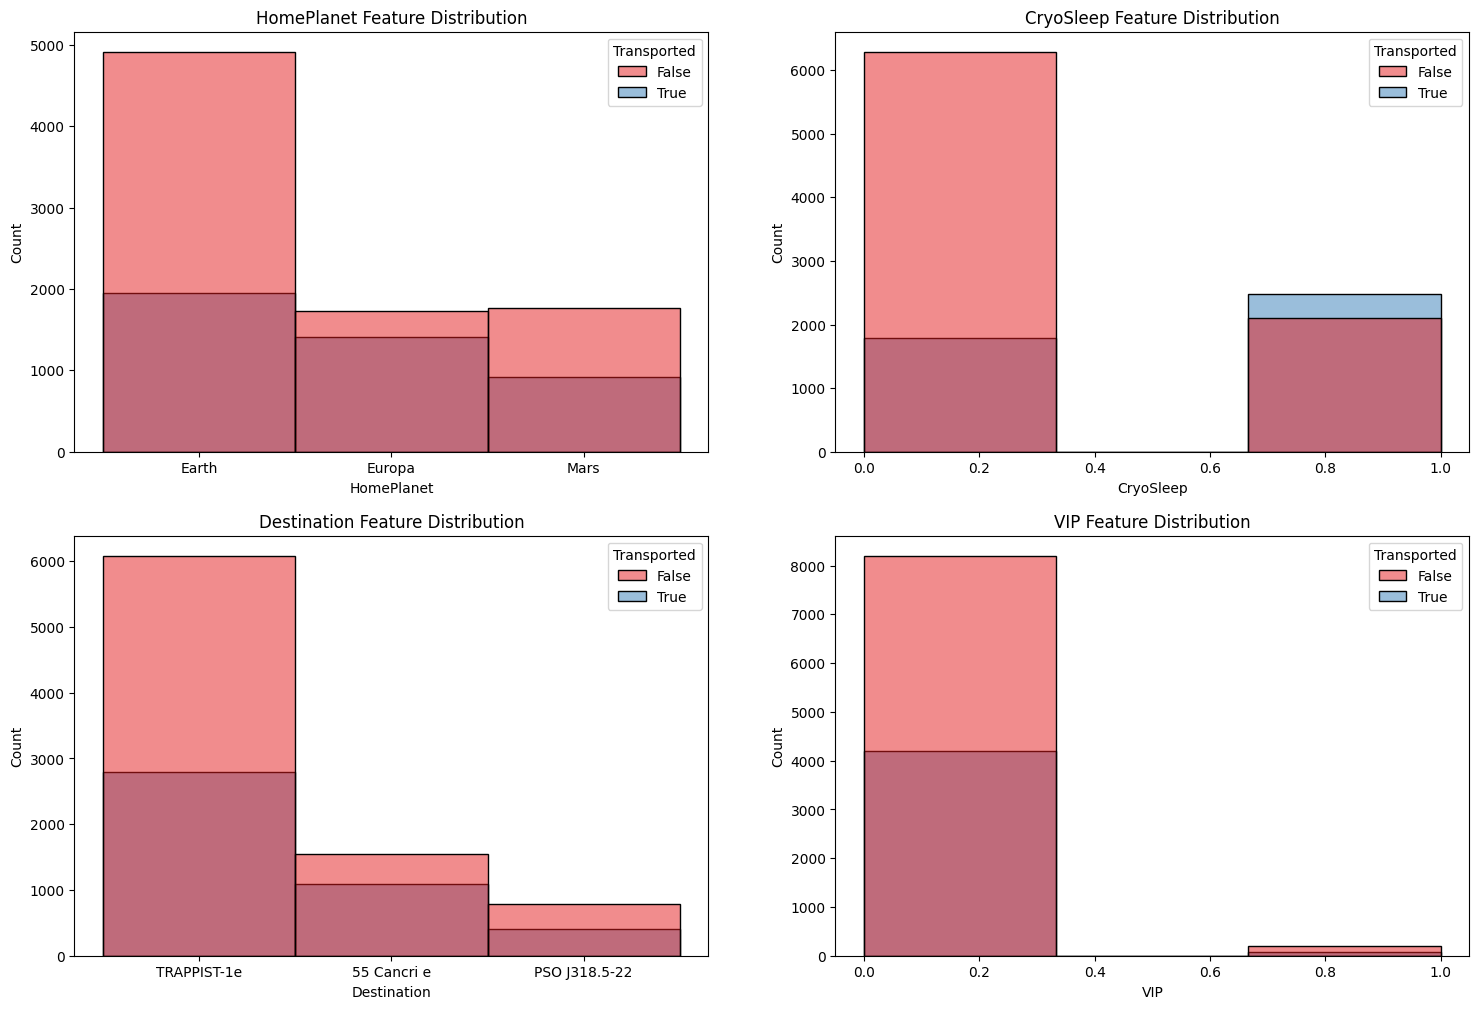

In [4]:
variables = ['HomePlanet','CryoSleep','Destination','VIP']
fig, axes = plt.subplots(2, 2, figsize=(18,12))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(x=total_data[var],
            hue=target,
            data=total_data,
            ax=axes[i],
            palette="Set1",
            binwidth=0.3)
    axes[i].set_title(f"{var} Feature Distribution")
plt.show()

Numerical vs target

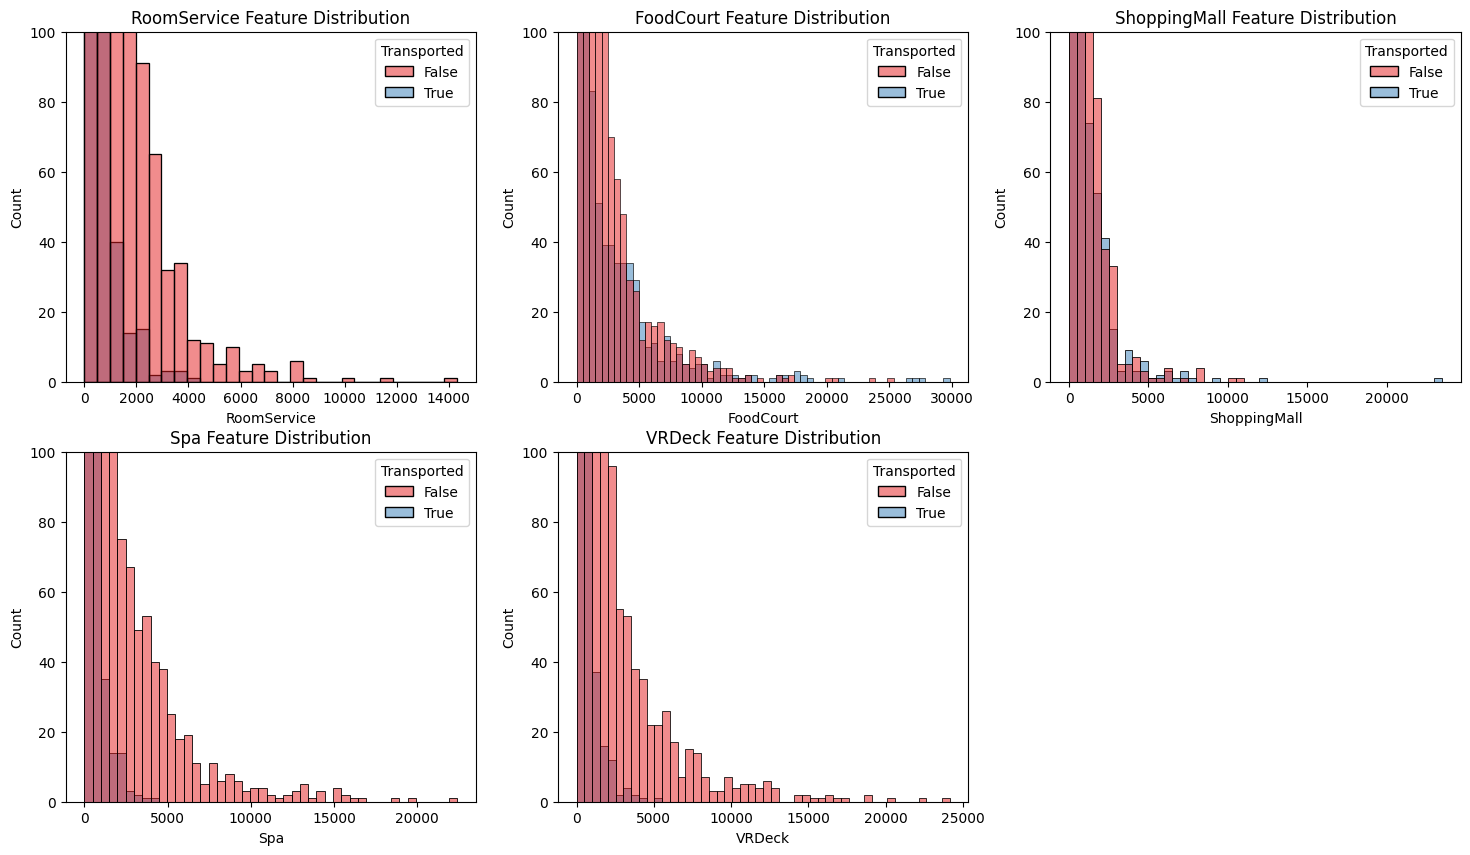

In [16]:
variables = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(x=total_data[var],
            hue=target,
            data=total_data,
            ax=axes[i],
            palette="Set1",
            binwidth=500
            )
    axes[i].set_title(f"{var} Feature Distribution")
    axes[i].set_ylim(0, 100)
    plt.ylim(0,100)

if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        axes[j].axis('off')

plt.show()



General correlation plot

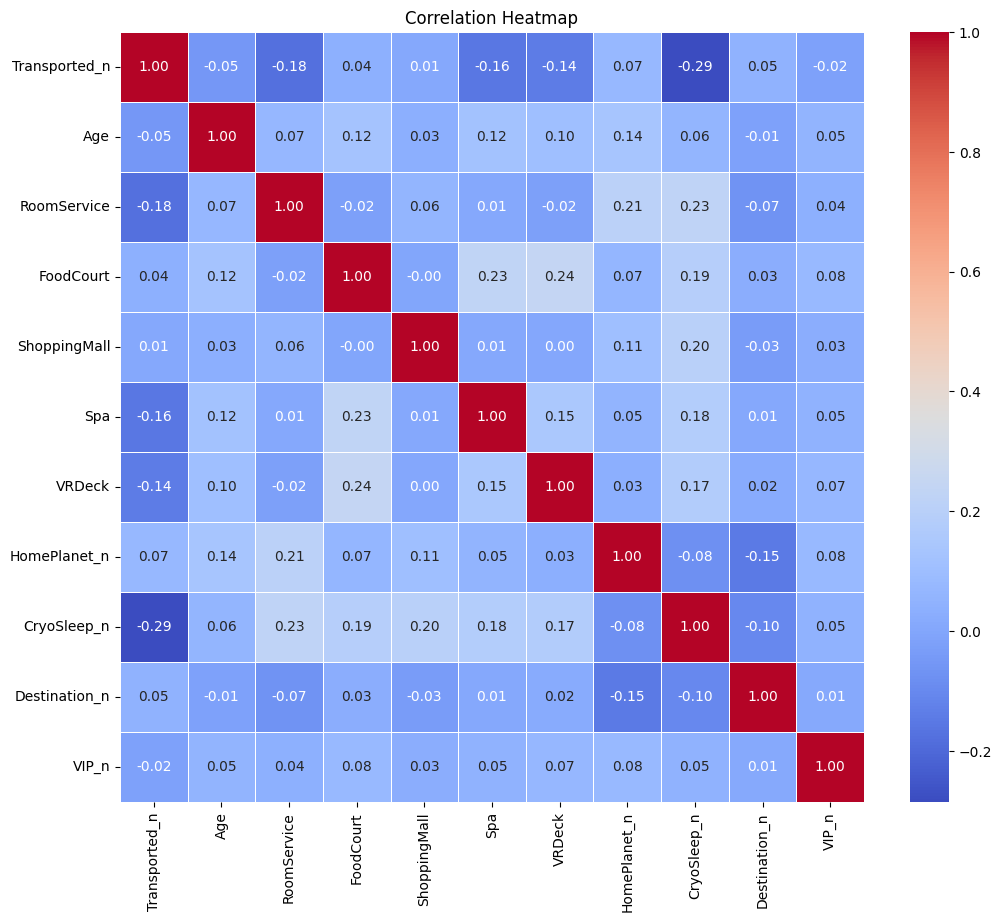

In [32]:
def correlation_heatmap(dataset):
    # make a copy of the dataset
    data = dataset.copy()
    
    # select categoric columns
    cat_variables = ['HomePlanet','CryoSleep',
                     'Destination', 'VIP', target]
    
    # transform categoric columns
    for var in cat_variables:
        if var in data.columns:
            data[var + '_n'] = pd.factorize(data[var])[0]
            data.drop(var,axis=1,inplace=True)

    # Reorder for plotting
    selection = [target+"_n"] + [col for col in data.columns if col != target+'_n'
                                 and col!= 'Cabin']

    # Create the heatmap data
    heatmap_data = data[selection]
    correlation_matrix = heatmap_data.corr()
    
    # Set the plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()  
correlation_heatmap(total_data)

In [20]:
def correlation_heatmap(dataset):
    # make a copy of the dataset
    data = dataset.copy()
    
    # select categoric columns
    cat_variables = ['HomePlanet','CryoSleep',
                     'Destination', 'VIP', target]
    
    # transform categoric columns
    for var in cat_variables:
        if var in data.column:
            data[var + '_n'] = pd.factorize(data[var])[0]

    # select numeric columns
    total_data = total_data.drop(cat_variables, axis=1)
    selection = [target] + [col for col in total_data.columns if col != target]
    
    # Create the heatmap data
    heatmap_data = total_data[selection]
    # Calculate the correlation matrix
    correlation_matrix = heatmap_data.corr()
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    # Create a heatmap with Seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    # Show the plot
    plt.title('Correlation Heatmap')
    plt.show()  


correlation_heatmap(total_data)

UnboundLocalError: cannot access local variable 'total_data' where it is not associated with a value

In [17]:
selection = [target] + [col for col in total_data.columns if col != target]


# Create the heatmap data
heatmap_data = total_data[selection]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Earth'

2.1. Age feature

Text(0.5, 1.0, 'Age Feature Distribution (every age)')

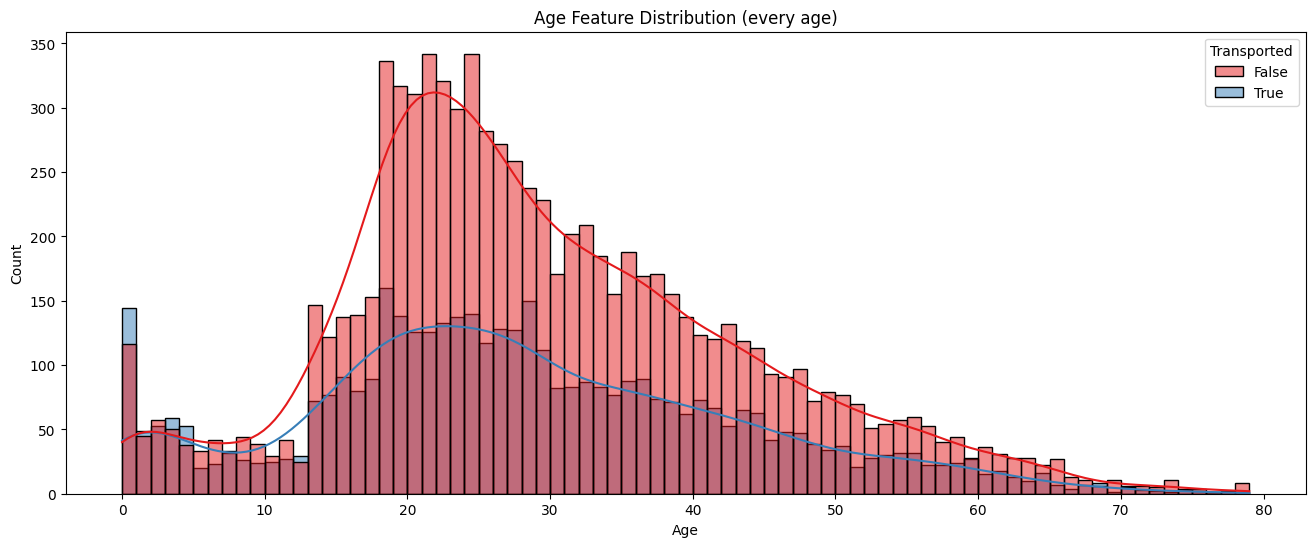

In [6]:
plt.figure(figsize=(16,6))
sns.histplot(x=total_data["Age"],
             hue="Transported",
             data=total_data,
             kde=True,
             palette="Set1",
             binwidth=1)
plt.title("Age Feature Distribution (every age)")

CONCLUSIONES

Text(0.5, 1.0, 'Age Feature Distribution (every age)')

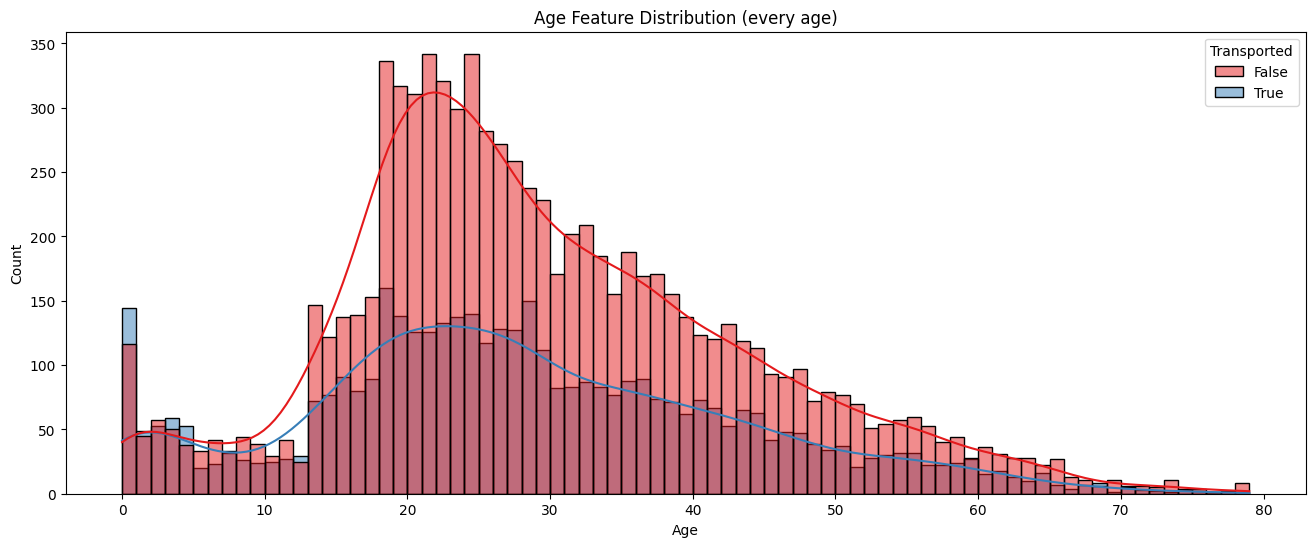

In [7]:
plt.figure(figsize=(16,6))
sns.histplot(x=total_data["Age"],
             hue="Transported",
             data=total_data,
             kde=True,
             palette="Set1",
             binwidth=1)
plt.title("Age Feature Distribution (every age)")

La relación entre edad y transportados nos muestra lo siguiente:
0-3 tiene mas transportados que no


Transported  False  True  diff  total     %
Age                                        
0.0            116   144    28    260  0.11
1.0             45    49     4     94  0.04
2.0             57    53    -4    110 -0.04
3.0             50    59     9    109  0.08
4.0             38    53    15     91  0.16
...            ...   ...   ...    ...   ...
75.0             4     2    -2      6 -0.33
76.0             1     1     0      2  0.00
77.0             2     1    -1      3 -0.33
78.0             3     1    -2      4 -0.50
79.0             5     0    -5      5 -1.00

[80 rows x 5 columns]
Transported grupo_cuartil    diff  total       %
0               Cuartil 1  -33.65   3215 -0.1485
1               Cuartil 2 -127.20   6728 -0.3740
2               Cuartil 3  -38.35   2379 -0.3170
3               Cuartil 4   -7.00    378 -0.3755


C:\Users\Francesc\AppData\Local\Temp\ipykernel_4548\3363422130.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_cuartiles = age_transported_counts.groupby('grupo_cuartil').agg({


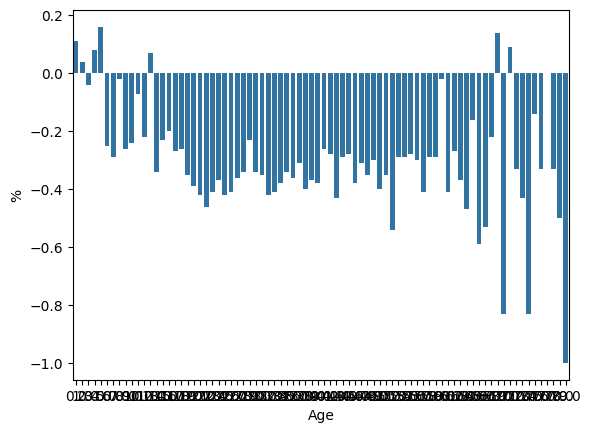

In [8]:
age_transported_counts = total_data.groupby(['Age','Transported']).size().unstack(fill_value=0)
age_transported_counts['diff'] = age_transported_counts[True] - age_transported_counts[False]
age_transported_counts["total"] = age_transported_counts[True] + age_transported_counts[False]
age_transported_counts["%"] = round(age_transported_counts['diff'] / age_transported_counts["total"],2)
print(age_transported_counts)

sns.barplot(x= age_transported_counts.index,
            y= age_transported_counts['%'],
            )


age_transported_counts = age_transported_counts.reset_index()

# Crear los grupos basados en cuartiles (o cualquier otro número de grupos que desees)
age_transported_counts['grupo_cuartil'] = pd.qcut(age_transported_counts['Age'], q=4, labels=["Cuartil 1", "Cuartil 2", "Cuartil 3", "Cuartil 4"])

# Ahora podemos agrupar por estos cuartiles y calcular la diferencia media en cada grupo
grupo_cuartiles = age_transported_counts.groupby('grupo_cuartil').agg({
    'diff': 'mean',  # Promedio de las diferencias
    'total': 'sum',  # Suma del total de personas en cada cuartil
    '%': 'mean'      # Promedio de las diferencias porcentuales
}).reset_index()

# Ver el resultado
print(grupo_cuartiles)


Conclusiones para la relación entre transportados.
Donde 